In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Movie.csv")

In [3]:
df.head()

,Unnamed: 0,movie_id,movie_name,year,genre,overview,director,cast
0,0,tt15354916,Jawan,2023,"Action, Thriller",A high-octane action thriller which outlines t...,Atlee,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ..."
1,1,tt15748830,Jaane Jaan,2023,"Crime, Drama, Mystery",A single mother and her daughter who commit a ...,Sujoy Ghosh,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ..."
2,2,tt11663228,Jailer,2023,"Action, Comedy, Crime",A retired jailer goes on a manhunt to find his...,Nelson Dilipkumar,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S..."
3,3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,"Comedy, Drama, Family",Flamboyant Punjabi Rocky and intellectual Beng...,Karan Johar,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana..."
4,4,tt15732324,OMG 2,2023,"Comedy, Drama",An unhappy civilian asks the court to mandate ...,Amit Rai,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa..."


***OBJECTIVE 1:Analyze Movie Release Trends Over Time***

In [8]:
print("Unique Years: ",sorted(df['year'].dropna().unique()))

Unique Years:  ['1932', '1951', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', 'V', 'V2020', 'V2023', 'X', 'X2020', 'XV2016', 'XXV', 'XXX']


In [10]:
print("Missing years:", df['year'].isnull().sum())

Missing years: 65


In [12]:
df = df[pd.to_numeric(df['year'], errors='coerce').notnull()]
df['year'] = df['year'].astype(int)

In [14]:
print("Unique Years: ",sorted(df['year'].dropna().unique()))

Unique Years:  [1932, 1951, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026]


In [16]:
# Keeping only movies from 1951 to 2023
df = df[(df['year'] >= 1951) & (df['year'] <= 2023)]

In [18]:
print(sorted(df['year'].unique()))

[1951, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [20]:
yearly_counts = df['year'].value_counts().sort_index()

In [22]:
print(yearly_counts.head(30))

year
1951     1
1953     1
1954     2
1955     4
1956     2
1957     5
1958     2
1959     1
1960     3
1961     3
1962     3
1963     2
1964     3
1965     7
1966     7
1967     3
1968     2
1969     6
1970     7
1971    11
1972     8
1973     9
1974    13
1975    13
1976    10
1977     9
1978     5
1979     8
1980    12
1981    12
Name: count, dtype: int64


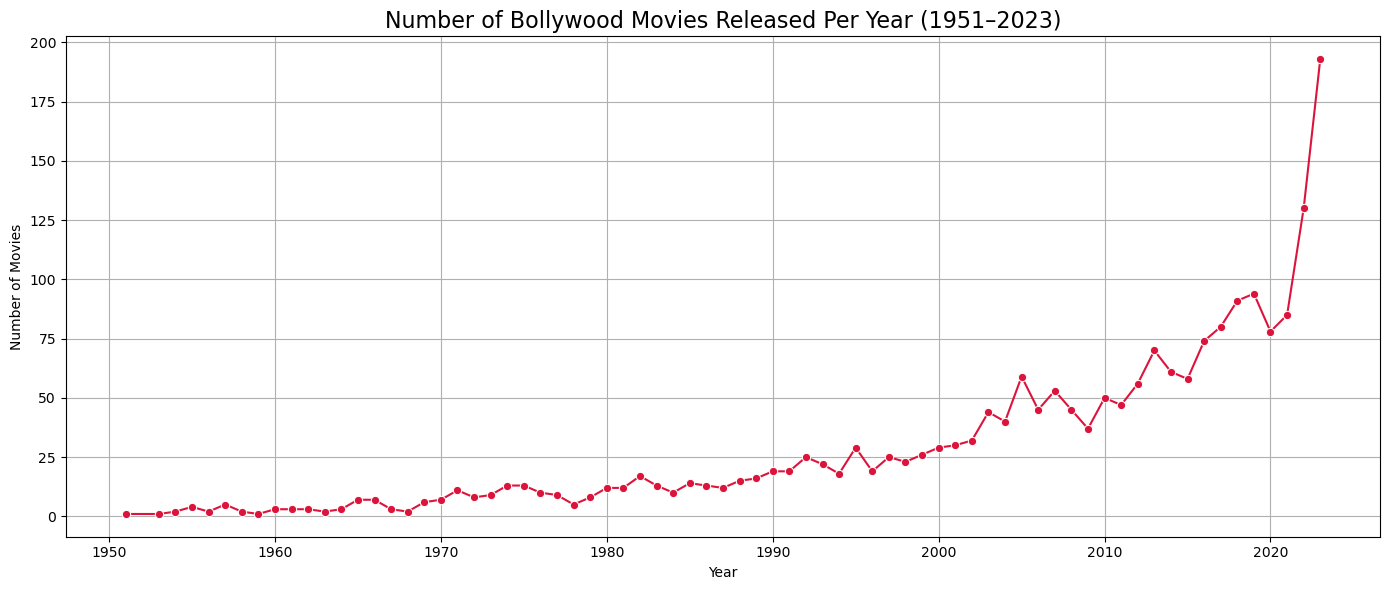

In [24]:
fig1 = plt.figure(figsize=(14, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='crimson')
plt.title('Number of Bollywood Movies Released Per Year (1951–2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

***Objective 2: Identify the Most Popular Movie Genres***

In [27]:
print(df['genre'].head(10))

0               Action, Thriller
1          Crime, Drama, Mystery
2          Action, Comedy, Crime
3          Comedy, Drama, Family
4                  Comedy, Drama
5                          Drama
6                         Family
7     Adventure, Family, Fantasy
8    Action, Adventure, Thriller
9         Action, Drama, History
Name: genre, dtype: object


In [29]:
print(df['genre'].unique())

['Action, Thriller' 'Crime, Drama, Mystery' 'Action, Comedy, Crime'
 'Comedy, Drama, Family' 'Comedy, Drama' 'Drama' 'Family'
 'Adventure, Family, Fantasy' 'Action, Adventure, Thriller'
 'Action, Drama, History' 'Comedy, Drama, Musical' 'Biography, Drama'
 'Action, Drama' 'Crime, Drama' 'Crime, Mystery, Thriller'
 'Action, Adventure, Drama' 'Action, Crime, Thriller'
 'Adventure, Drama, Fantasy' 'Action, Biography, Drama'
 'Adventure, Comedy, Drama' 'Drama, Fantasy, Horror'
 'Crime, Drama, Thriller' 'Action, Biography, Crime'
 'Action, Crime, Drama' 'Comedy, Drama, Romance' 'Action, Drama, Romance'
 'Action, Adventure, Fantasy' 'Drama, Sport' 'Comedy, Romance'
 'Biography, Drama, History' 'Comedy, Drama, Sci-Fi'
 'Adventure, Drama, Romance' 'Comedy' 'Drama, Family'
 'Biography, Crime, Drama' 'Crime, Horror, Mystery' 'Thriller'
 'Action, Adventure, Crime' 'Action, Comedy, Drama'
 'Drama, Musical, Romance' 'Drama, Musical' 'Action, Adventure, Comedy'
 'Drama, Thriller' 'Comedy, Drama, Fan

In [31]:
print(df['genre'].nunique())

221


In [33]:
print(df['genre'].value_counts().head(10))

genre
Action, Crime, Drama       172
Drama                      150
Drama, Romance             115
Comedy, Drama, Romance     111
Comedy, Drama               88
Action, Comedy, Drama       63
Action, Drama               56
Action, Drama, Romance      56
Action, Comedy, Crime       47
Drama, Musical, Romance     44
Name: count, dtype: int64


In [35]:
genre_split = df['genre'].dropna().str.split(',', expand=False)

In [37]:
from collections import Counter

In [39]:
all_genres = [g.strip() for sublist in genre_split for g in sublist]

In [41]:
genre_counts = Counter(all_genres)

In [43]:
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

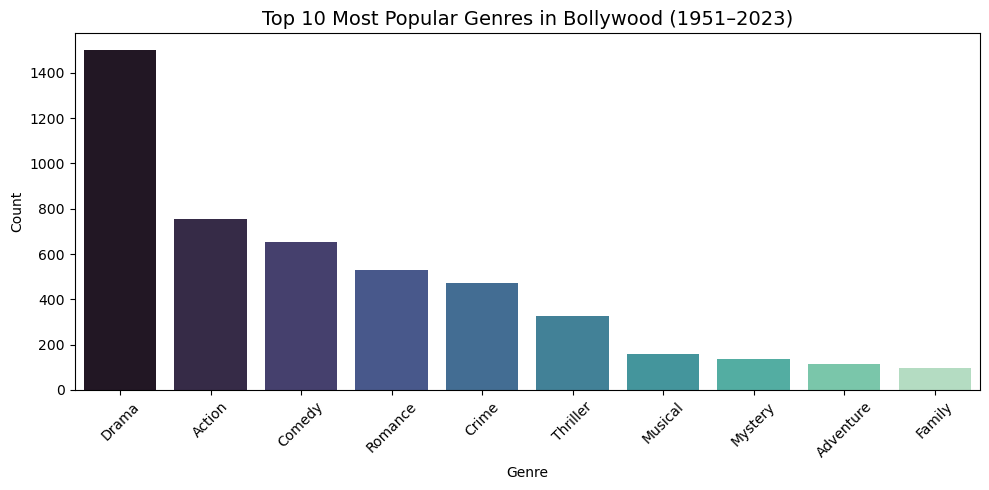

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=genre_df.head(10), 
    x='Genre', 
    y='Count', 
    hue='Genre',          # Use Genre as hue
    palette='mako', 
    dodge=False,          # Prevent bars from splitting
    legend=False          # Hide repeated legend
)
plt.title('Top 10 Most Popular Genres in Bollywood (1951–2023)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Objective 3: Discover the Most Prolific Directors***

In [48]:
df['director'].isnull().sum()

# Count top 10 directors by number of movies
top_directors = df['director'].value_counts().head(10)

In [50]:
top_directors_df = top_directors.reset_index()
top_directors_df.columns = ['Director', 'Movie_Count']

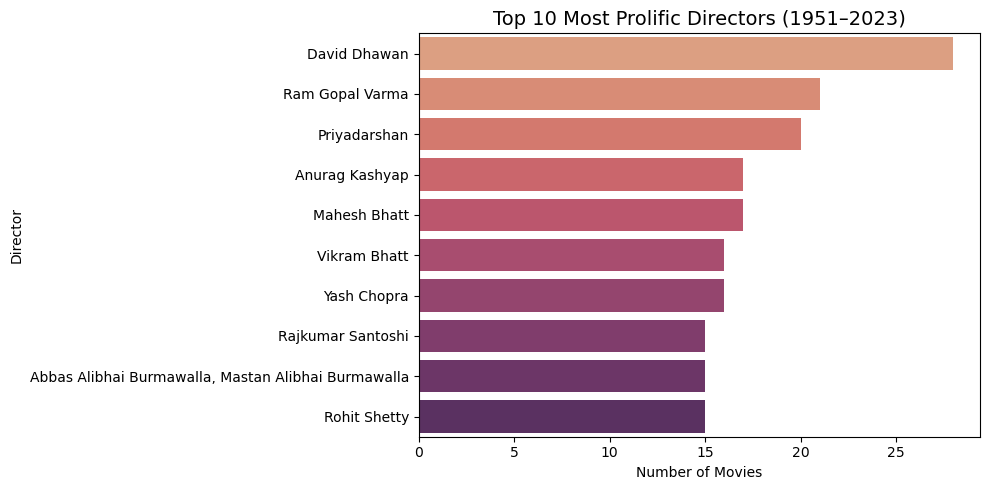

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=top_directors_df, 
    x='Movie_Count', 
    y='Director', 
    hue='Director',         # Use Director as hue
    palette='flare', 
    dodge=False, 
    legend=False            # Avoid duplicated legend
)
plt.title('Top 10 Most Prolific Directors (1951–2023)', fontsize=14)
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

***Objective 4: Analyze Casting Patterns***

In [55]:
cast_split = df['cast'].dropna().str.split(',', expand=False)
all_actors = [actor.strip() for sublist in cast_split for actor in sublist]

from collections import Counter
actor_counts = Counter(all_actors)

actor_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending=False)

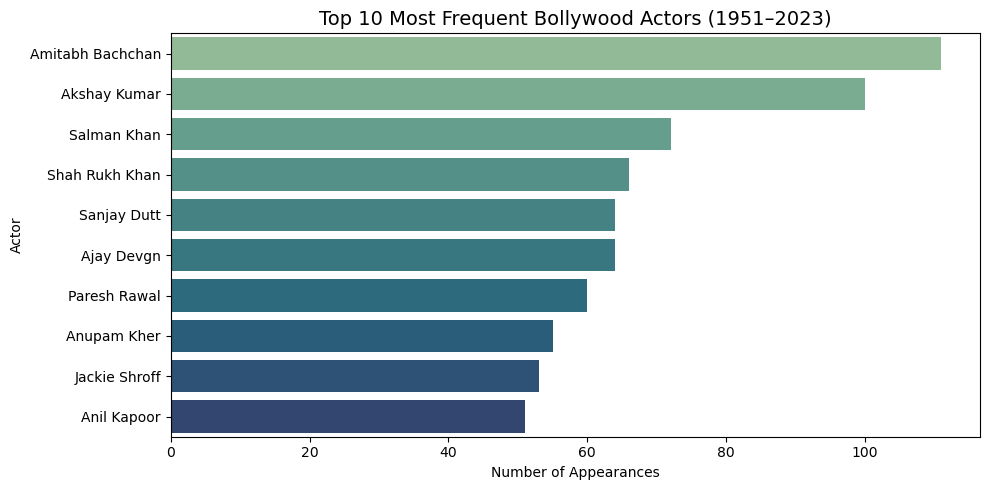

In [57]:
top_actors_df = actor_df.head(10).copy()

# Plot without FutureWarning
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_actors_df, 
    x='Count', 
    y='Actor', 
    hue='Actor',        # Assign hue to match palette
    palette='crest', 
    dodge=False, 
    legend=False
)
plt.title('Top 10 Most Frequent Bollywood Actors (1951–2023)', fontsize=14)
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

***Objective 5:Examine Genre Trends Over Time***

In [60]:
df['decade'] = (df['year'] // 10) * 10

# Create exploded genre column (1 row per genre per movie)
df_exploded = df.dropna(subset=['genre']).copy()
df_exploded['genre'] = df_exploded['genre'].str.split(',')
df_exploded = df_exploded.explode('genre')
df_exploded['genre'] = df_exploded['genre'].str.strip()

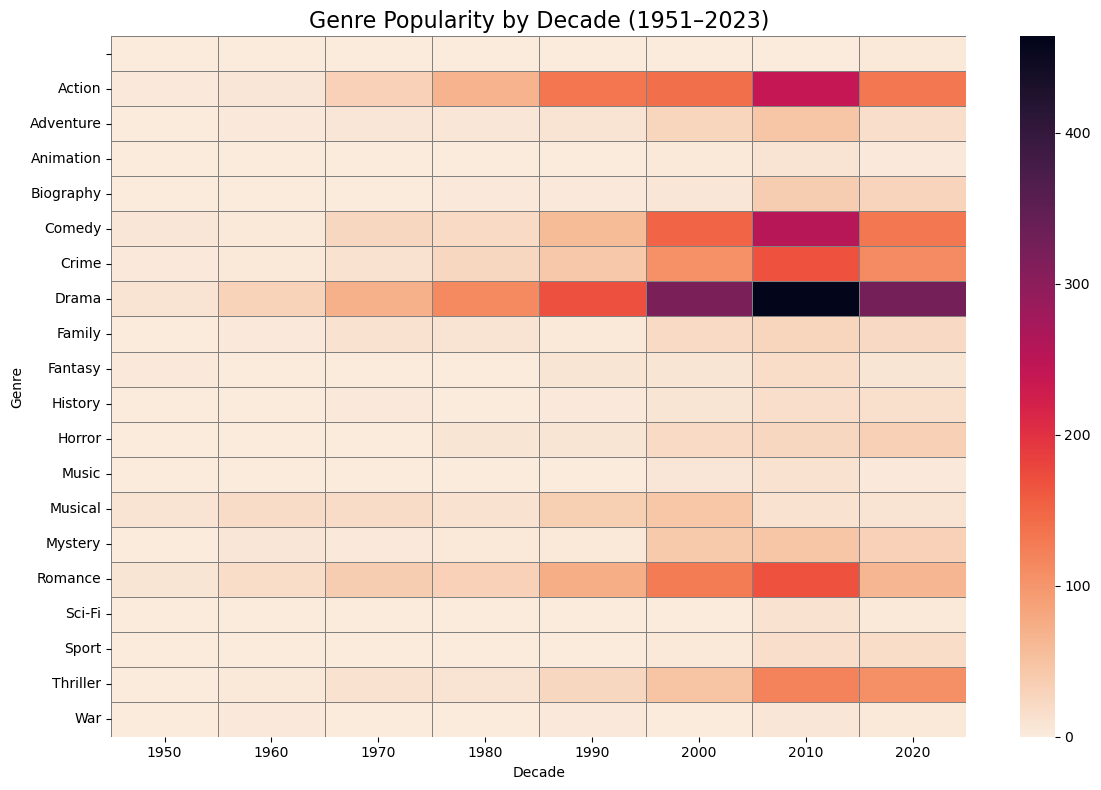

In [62]:
genre_decade = df_exploded.pivot_table(index='genre', columns='decade', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(genre_decade, cmap='rocket_r', linewidths=0.5, linecolor='gray')
plt.title('Genre Popularity by Decade (1951–2023)', fontsize=16)
plt.xlabel('Decade')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

***Objective 6: Release Patterns***

In [64]:
df.dropna(subset=['year'])

,Unnamed: 0,movie_id,movie_name,year,genre,overview,director,cast,decade
0,0,tt15354916,Jawan,2023,"Action, Thriller",A high-octane action thriller which outlines t...,Atlee,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ...",2020
1,1,tt15748830,Jaane Jaan,2023,"Crime, Drama, Mystery",A single mother and her daughter who commit a ...,Sujoy Ghosh,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ...",2020
2,2,tt11663228,Jailer,2023,"Action, Comedy, Crime",A retired jailer goes on a manhunt to find his...,Nelson Dilipkumar,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S...",2020
3,3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,"Comedy, Drama, Family",Flamboyant Punjabi Rocky and intellectual Beng...,Karan Johar,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana...",2020
4,4,tt15732324,OMG 2,2023,"Comedy, Drama",An unhappy civilian asks the court to mandate ...,Amit Rai,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa...",2020
...,...,...,...,...,...,...,...,...,...
2193,2194,tt0214832,Kalicharan,1976,"Action, Adventure, Crime",A police officer goes undercover to catch a we...,Subhash Ghai,"Shatrughan Sinha, Reena Roy, Ajit Khan, Premna...",1970
2195,2196,tt0332766,Sur: The Melody of Life,2002,"Drama, Musical, Romance",A renowned music teacher mentors a promising y...,Tanuja Chandra,"Lucky Ali, Simone Singh, Achint Kaur, Ehsan Khan",2000
2196,2197,tt8622232,Time to Dance,2021,"Musical, Romance",When a ballroom dancer's shot at a crucial tou...,Stanley D'Costa,"Sooraj Pancholi, Isabelle Kaif, Waluscha D'Sou...",2020
2197,2198,tt0187351,Nigahen: Nagina Part II,1989,"Drama, Family, Fantasy",After the tragic deaths of his son Ajit and da...,Harmesh Malhotra,"Sunny Deol, Sridevi, Anupam Kher, Gulshan Grover",1980


In [66]:
yearlyCount= df['year'].value_counts().sort_index()

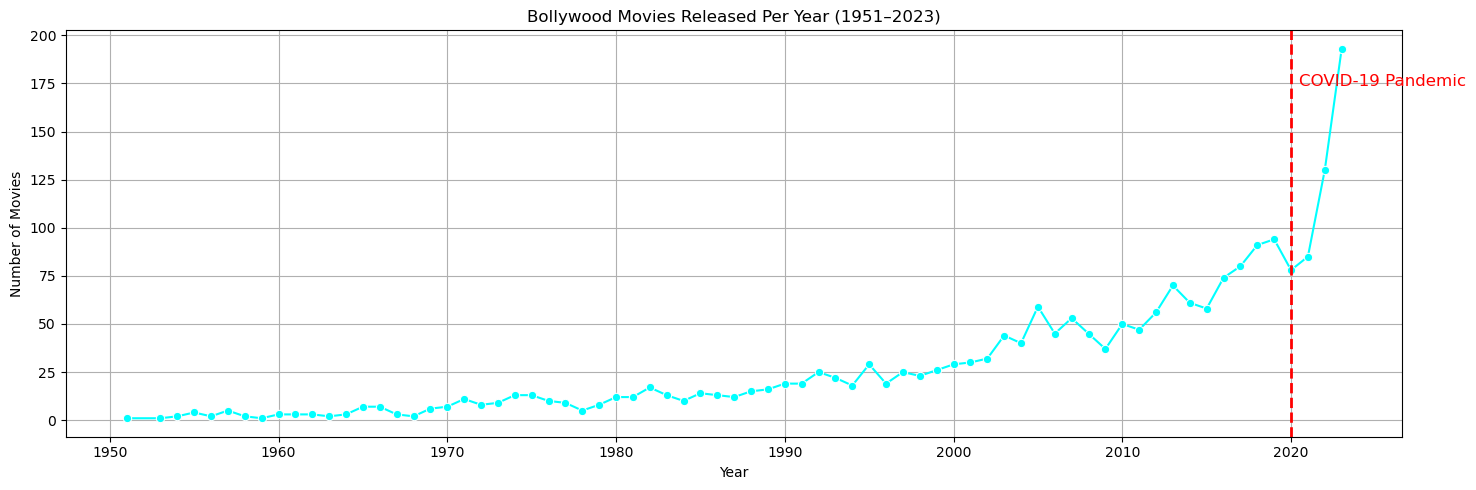

In [67]:
plt.figure(figsize=(15,5))
sns.lineplot(x=yearlyCount.index,y=yearlyCount.values,marker='o', color='cyan')
plt.title('Bollywood Movies Released Per Year (1951–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
# Highlight 2020 (COVID-19)
plt.axvline(x=2020, color='red', linestyle='--', linewidth=2)
plt.text(2020 + 0.5, max(yearlyCount.values) * 0.9, 'COVID-19 Pandemic', color='red', fontsize=12)

plt.tight_layout()
plt.show()